#Simulation of the fermentation process



In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

from sklearn.metrics import mean_squared_error

In [ ]:
def RMSE(test, predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

Upload data, remove unnecessary, rename

In [ ]:
df = pd.read_excel("data_60K_new.xls")
df = df.drop(columns=["№"]).rename(columns={"Data 0" : "Volume", "Data 1" : "Yeasts", "Data 2" : "Sugar", "Data 3" : "Time", "Data 4" : "Volume", "Data 5" : "Strength"})

In [ ]:
df.head()

,Volume,Yeasts,Sugar,Time,Volume,Strength
0,17.962934,0.132343,0.782747,3575.486071,0.114437,0.575088
1,24.455977,0.030347,1.637357,3146.298408,0.364644,0.155035
2,21.595141,0.031067,0.683214,5569.506777,0.189531,0.160324
3,26.072668,0.184931,2.400811,2506.732638,1.041184,0.709518
4,19.907137,0.149927,2.428735,3043.826679,1.369514,0.572725


Sorting data by time

In [ ]:
df = df.sort_values(by="Time")

In [ ]:
X = df.iloc[:, 0:4].to_numpy()
Y = df.iloc[:, 4:6].to_numpy()

In [ ]:
X_scaler = MinMaxScaler(feature_range=(0, 1))
Y_scaler = MinMaxScaler(feature_range=(0, 1))

X_scaled = X_scaler.fit_transform(X)
Y_scaled = Y_scaler.fit_transform(Y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y_scaled, test_size=0.2)

##Linear Regression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([[-0.04885744,  0.15143209,  0.27386179,  0.6213962 ],
       [ 0.15709456,  0.79737315, -0.08828804, -0.18450862]])

In [ ]:
Y_scaler.inverse_transform(lr.predict(X_scaler.transform([[5, 0.194311, 3.449535, 2000]])))

array([[1.6030077 , 0.64201556]])

In [ ]:
predicted = Y_scaler.inverse_transform(lr.predict(x_test))
test = Y_scaler.inverse_transform(y_test)

In [ ]:
RMSE(test, predicted)

The root mean squared error is 0.23810204044085295.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


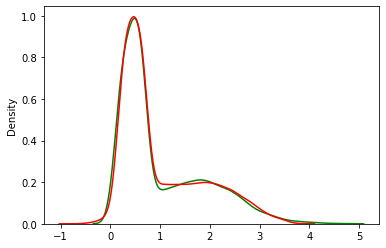

In [ ]:
ax1 = sns.distplot(test, hist=False, color="g", label="Actual Value")
sns.distplot(predicted, hist=False, color="r", label="Fitted Values" , ax=ax1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


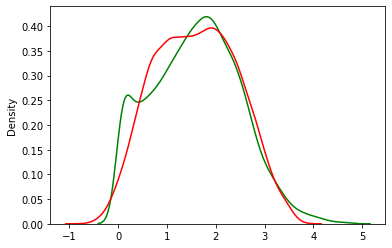

In [ ]:
ax1 = sns.distplot(test[:, 0], hist=False, color="g", label="Actual Value")
sns.distplot(predicted[:, 0], hist=False, color="r", label="Fitted Values" , ax=ax1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


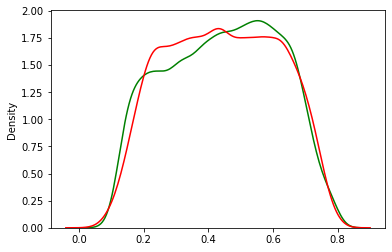

In [ ]:
ax1 = sns.distplot(test[:, 1], hist=False, color="g", label="Actual Value")
sns.distplot(predicted[:, 1], hist=False, color="r", label="Fitted Values" , ax=ax1)

##LSTM


In [ ]:
lstm = Sequential()

lstm.add(LSTM(units=100, return_sequences=True, input_shape=(X.shape[1], 1)))
lstm.add(Dropout(0.1))

lstm.add(LSTM(units=100, return_sequences=True))
lstm.add(Dropout(0.1))

lstm.add(LSTM(units=100, return_sequences=True))
lstm.add(Dropout(0.1))

lstm.add(LSTM(units=100))
lstm.add(Dropout(0.1))

lstm.add(Dense(units=2))

lstm.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
lstm.fit(x_train, y_train, epochs=75, batch_size=1024, validation_data=(x_test, y_test))

Epoch 75/75
47/47 [==============================] - 12s 256ms/step - loss: 6.9708e-04 - val_loss: 1.0764e-04


In [ ]:
predicted = Y_scaler.inverse_transform(lstm.predict(x_test))
test = Y_scaler.inverse_transform(y_test)

In [ ]:
return_rmse(test, predicted)

The root mean squared error is 0.04518475808075853.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


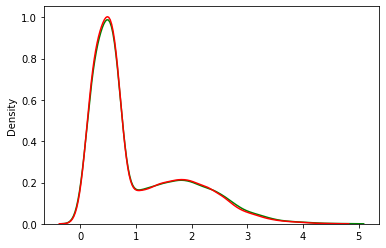

In [ ]:
ax1 = sns.distplot(test, hist=False, color="g", label="Actual Value")
sns.distplot(predicted, hist=False, color="r", label="Fitted Values" , ax=ax1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


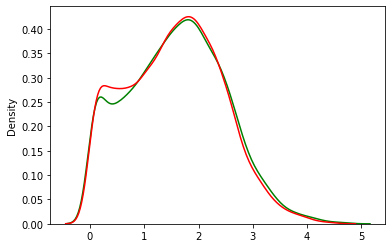

In [ ]:
ax1 = sns.distplot(test[:, 0], hist=False, color="g", label="Actual Value")
sns.distplot(predicted[:, 0], hist=False, color="r", label="Fitted Values" , ax=ax1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


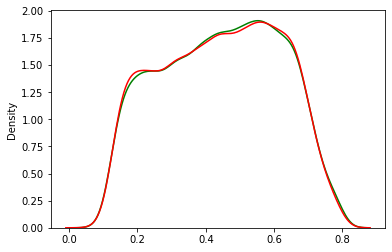

In [ ]:
ax1 = sns.distplot(test[:, 1], hist=False, color="g", label="Actual Value")
sns.distplot(predicted[:, 1], hist=False, color="r", label="Fitted Values" , ax=ax1)